#Importing Required Libraries

In [66]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [67]:
import re
import nltk
from nltk.util import pr
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
stopword = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Loading the Dataset

In [68]:
df = pd.read_csv("/content/clean_data.csv")
df.head()

,is_offensive,text
0,0,Then go to the village pump and suggest they c...
1,1,ANTI GREEK NATIONALIS -WIKIPEDIA \n\nHi Alexik...
2,1,Dis hoe wasnt dis violent on Lottery Ticket 😂😂
3,0,It is better for Atabay not helping the banned...
4,0,"""is in CamelCase. """"SiCKO"""" is not CamelCase,..."


In [69]:
#Finding shape of the dataset
df.shape

(184354, 2)

In [70]:
#creating copy of the dataset
New_df = df.copy()

##Pre-Processing the data

In [71]:
#importing ntlk tokenization to remove punctuations
from nltk.tokenize.sonority_sequencing import punctuation
#defining function to preprocess the data
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?]', '', text)
  text = re.sub('https?://\S+www.\S+', '', text)
  text = re.sub('<.*?<+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text = ' '.join(text)
  return text

New_df['cleaned_text'] = df['text'].apply(clean)
New_df['cleaned_text'] = New_df['cleaned_text'].str.replace("[^a-zA-Z#]", " ")
New_df.head()

<ipython-input-71-bbcdb547af90>:17: FutureWarning: The default value of regex will change from True to False in a future version.
  New_df['cleaned_text'] = New_df['cleaned_text'].str.replace("[^a-zA-Z#]", " ")


,is_offensive,text,cleaned_text
0,0,Then go to the village pump and suggest they c...,go village pump suggest change language rfc set
1,1,ANTI GREEK NATIONALIS -WIKIPEDIA \n\nHi Alexik...,anti greek nationalis wikipedia hi alexikouayo...
2,1,Dis hoe wasnt dis violent on Lottery Ticket 😂😂,dis hoe wasnt dis violent lottery ticket
3,0,It is better for Atabay not helping the banned...,better atabay helping banned vandals pushing pov
4,0,"""is in CamelCase. """"SiCKO"""" is not CamelCase,...",camelcase sicko camelcase camelcase rule r ba...


1. Created function to clean all the text data.
2. Cleaned all punctuations, removed stopwords, except alphabets all the unneccessary data.
3. Created new column cleaned_text and saved all cleaned data.

In [72]:
#new data set
New_df.head()

,is_offensive,text,cleaned_text
0,0,Then go to the village pump and suggest they c...,go village pump suggest change language rfc set
1,1,ANTI GREEK NATIONALIS -WIKIPEDIA \n\nHi Alexik...,anti greek nationalis wikipedia hi alexikouayo...
2,1,Dis hoe wasnt dis violent on Lottery Ticket 😂😂,dis hoe wasnt dis violent lottery ticket
3,0,It is better for Atabay not helping the banned...,better atabay helping banned vandals pushing pov
4,0,"""is in CamelCase. """"SiCKO"""" is not CamelCase,...",camelcase sicko camelcase camelcase rule r ba...


In [73]:
New_df.shape

(184354, 3)

#Extracting 10000 rows for training the model

In [74]:
#Extracted 10000 rows from dataset 
New_df_extracted = New_df.iloc[:10000]

In [75]:
New_df_extracted.shape

(10000, 3)

In [76]:
New_df_extracted.head()

,is_offensive,text,cleaned_text
0,0,Then go to the village pump and suggest they c...,go village pump suggest change language rfc set
1,1,ANTI GREEK NATIONALIS -WIKIPEDIA \n\nHi Alexik...,anti greek nationalis wikipedia hi alexikouayo...
2,1,Dis hoe wasnt dis violent on Lottery Ticket 😂😂,dis hoe wasnt dis violent lottery ticket
3,0,It is better for Atabay not helping the banned...,better atabay helping banned vandals pushing pov
4,0,"""is in CamelCase. """"SiCKO"""" is not CamelCase,...",camelcase sicko camelcase camelcase rule r ba...


#Splitting the data

In [77]:
#splitting the data. X is the feature and y is the target
x = np.array(New_df_extracted['cleaned_text'])
y = np.array(New_df_extracted['is_offensive'])

In [78]:
x

array(['go village pump suggest change language rfc set',
       'anti greek nationalis wikipedia hi alexikouayous vandalise wikipedia editing false informationyou may chauvinist edit false information wikipediathere nowhere  percent greeks albania  real information census vandalise wikipedia militant ideas',
       'dis hoe wasnt dis violent lottery ticket   ', ...,
       ' oh see actually using completely wrong font wikipedia doesnt many fonts installed svg rendering need font listed msvg fonts youll use object path command path menu also might want consider whether pdtext could apply letter images suppose mostly depends whether font used considered common font   ',
       'article completely biased  person narendra modis payroll consistently reverse edits made article anyone one need stop',
       ' dirty version removed comment saying dirty version leaked internet contained raunchier lyrics  incorrect dirty version original recording  radio video versions edited '],
      dtype=ob

In [79]:
y

array([0, 1, 1, ..., 0, 0, 0])

#Count vectorizer

In [80]:
#CountVectorizer object is created and assigned to the variable cv
cv = CountVectorizer()
x = cv.fit_transform(x)

1.CountVectorizer class is imported from scikit-learn's sklearn.feature_extraction.text module. This object will be used to convert the input text data into a count matrix representation.
2. The fit_transform() method of the CountVectorizer object is used to convert the input data x into a count matrix. The fit_transform() method performs two main actions:

1> Fitting: During the fit() step, the CountVectorizer analyzes the input text data to learn the vocabulary and build the necessary data structures.

2> Transforming: After fitting, the transform() step takes place. The transform() method converts the input text data into a count matrix representation based on the learned vocabulary.

In [81]:
x

<10000x38807 sparse matrix of type '<class 'numpy.int64'>'
	with 245987 stored elements in Compressed Sparse Row format>

#splitting the data into train and test data

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 42)

In [83]:
x_train.shape

(6700, 38807)

In [84]:
x_test.shape

(3300, 38807)

#Building and Fitting DecisionTreeClassifier Model

In [85]:
#Building and fitting the model
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

#Predicting test data

In [86]:
#Predicting test data
y_predict = clf.predict(x_test)

In [87]:
y_predict

array([0, 1, 0, ..., 0, 0, 0])

In [88]:
#creating dataframe with actual and predicted columns
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df1.head()

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


#Evaluation Metrics

In [89]:
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score, confusion_matrix, f1_score

**Confusion Matrix**

In [90]:
#creating confusion matrix
confusion_matrix(y_test,y_predict)

array([[2528,   94],
       [ 159,  519]])

<Axes: >

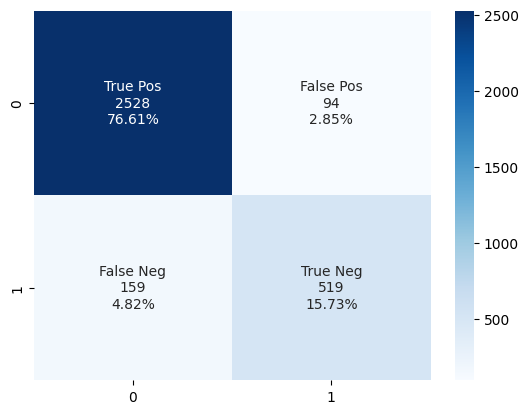

In [91]:
#Plotting heatmap for confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_predict)
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

**F1 Score**

In [92]:
#finding f1 score
f1_score(y_test,y_predict)

0.804027885360186

**AUROC Plot**

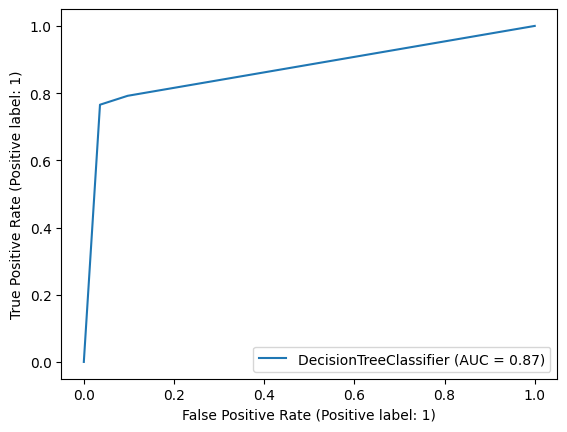

In [93]:
RocCurveDisplay.from_estimator(clf, x_test, y_test)

In [94]:
#Predicting for train data
train_predict = clf.predict(x_train)

In [95]:
#calculating F1 Score
f1_score(y_train,train_predict)

0.9996181748759068

#Installing better profanity for checking profanity

In [96]:
!pip install better-profanity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
from better_profanity import profanity

In [98]:
#Creating function for removing bad words 
def remove_profanity(text):
  # test_data ="I wil kill you"
  test_word=  cv.transform([text]).toarray()
  predict = clf.predict(test_word)
  lst = predict.tolist()
  for i in range(len(lst)):
    if lst[i] == 1:
      new_text = profanity.censor(text, "#")
    else:
      return text
  return new_text



#Making Predictions

In [99]:
test_data ="I wil kill you"
test_word=  cv.transform([test_data]).toarray()
predict = clf.predict(test_word)

In [100]:
lst = predict.tolist()
print(type(lst))

<class 'list'>


In [101]:
response = remove_profanity("I will fuck you")
response

'I will #### you'

#creating column response for removing profanity and for replacing with '#'

In [102]:
New_df_extracted['response'] = New_df_extracted['cleaned_text'].apply(remove_profanity)

<ipython-input-102-9c0e7de295b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_df_extracted['response'] = New_df_extracted['cleaned_text'].apply(remove_profanity)


In [103]:
New_df_extracted.head(30)

,is_offensive,text,cleaned_text,response
0,0,Then go to the village pump and suggest they c...,go village pump suggest change language rfc set,go village pump suggest change language rfc set
1,1,ANTI GREEK NATIONALIS -WIKIPEDIA \n\nHi Alexik...,anti greek nationalis wikipedia hi alexikouayo...,anti greek nationalis wikipedia hi alexikouayo...
2,1,Dis hoe wasnt dis violent on Lottery Ticket 😂😂,dis hoe wasnt dis violent lottery ticket,dis hoe wasnt dis violent lottery ticket
3,0,It is better for Atabay not helping the banned...,better atabay helping banned vandals pushing pov,better atabay helping banned vandals pushing pov
4,0,"""is in CamelCase. """"SiCKO"""" is not CamelCase,...",camelcase sicko camelcase camelcase rule r ba...,camelcase sicko camelcase camelcase rule r ba...
5,0,and \n\nHi! has Requested Arbitration with m...,hi requested arbitration mewikipediarequests...,hi requested arbitration mewikipediarequests...
6,0,Nonetheless lactose has a hemiacetal group whi...,nonetheless lactose hemiacetal group eg sucros...,nonetheless lactose hemiacetal group eg sucros...
7,0,Revert as much as you want \n\nBut never say y...,revert much want never say permission attack l...,revert much want never say permission attack l...
8,1,Yo bag Gucci but you still ugly hoe shut up,yo bag gucci still ugly hoe shut,yo bag gucci still #### hoe shut
9,0,Thanks\nI would have used the ping thanks but ...,thanksi would used ping thanks include sentime...,thanksi would used ping thanks include sentime...


In [104]:
New_df_extracted.shape

(10000, 4)